In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [6]:
s = pd.Series(np.random.randn(4))
print(s)
print()
print("s times 100:")
print(s*100)

0   -0.689278
1    0.208559
2    1.384111
3    0.777084
dtype: float64

s times 100:
0    -68.927775
1     20.855853
2    138.411126
3     77.708416
dtype: float64


In [7]:
t = pd.Series((1,2,3,4))
print(t)

0    1
1    2
2    3
3    4
dtype: int64


In [5]:
s.describe()

count    4.000000
mean    -0.848639
std      0.626167
min     -1.546348
25%     -1.166150
50%     -0.901615
75%     -0.584104
max     -0.044981
dtype: float64

In [7]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN   -0.689278
AAPL    0.208559
MSFT    1.384111
GOOG    0.777084
dtype: float64

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [14]:
df[['country','year','XRAT','tcgdp', 'cg']]

,country,year,XRAT,tcgdp,cg
0,Argentina,2000,0.999500,2.950722e+05,5.578804
1,Australia,2000,1.724830,5.418047e+05,6.720098
2,India,2000,44.941600,1.728144e+06,14.072206
3,Israel,2000,4.077330,1.292539e+05,10.266688
4,Malawi,2000,59.543808,5.026222e+03,11.658954
5,South Africa,2000,6.939830,2.272424e+05,5.726546
6,United States,2000,1.000000,9.898700e+06,6.032454
7,Uruguay,2000,12.099592,2.525596e+04,5.108068


In [16]:
df.loc[2:5,['country','year','XRAT','tcgdp', 'cg']]

,country,year,XRAT,tcgdp,cg
2,India,2000,44.941600,1.728144e+06,14.072206
3,Israel,2000,4.077330,1.292539e+05,10.266688
4,Malawi,2000,59.543808,5.026222e+03,11.658954
5,South Africa,2000,6.939830,2.272424e+05,5.726546


In [17]:
df.query('POP>=10000 and cg > 10')

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [18]:
df_subset = df[['country', 'POP', 'tcgdp']]
df_subset

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [19]:
df.apply(max)

country                Uruguay
country isocode            ZAF
year                      2000
POP                1006300.297
XRAT                 59.543808
tcgdp                9898700.0
cc                    78.97874
cg                   14.072206
dtype: object

In [8]:
df.where(df.POP >= 20000, "Not used")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.9995,295072.21869,75.716805,5.578804
1,Not used,Not used,Not used,Not used,Not used,Not used,Not used,Not used
2,India,IND,2000,1006300.297,44.9416,1728144.3748,64.575551,14.072206
3,Not used,Not used,Not used,Not used,Not used,Not used,Not used,Not used
4,Not used,Not used,Not used,Not used,Not used,Not used,Not used,Not used
5,South Africa,ZAF,2000,45064.098,6.93983,227242.36949,72.71871,5.726546
6,United States,USA,2000,282171.957,1.0,9898700.0,72.347054,6.032454
7,Not used,Not used,Not used,Not used,Not used,Not used,Not used,Not used


In [25]:
df = df[['country', 'POP', 'tcgdp']]
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [26]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [27]:
df['total GDP'] = df['total GDP'] * 1000000
df['population'] = df['population'] * 1000
df


,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+11
Australia,1.905319e+07,5.418047e+11
India,1.006300e+09,1.728144e+12
Israel,6.114570e+06,1.292539e+11
Malawi,1.180150e+07,5.026222e+09
South Africa,4.506410e+07,2.272424e+11
United States,2.821720e+08,9.898700e+12
Uruguay,3.219793e+06,2.525596e+10


In [28]:
df['GDPpc'] = df['total GDP']/df['population']
df

,population,total GDP,GDPpc
country,,,
Argentina,3.733565e+07,2.950722e+11,7903.229085
Australia,1.905319e+07,5.418047e+11,28436.433261
India,1.006300e+09,1.728144e+12,1717.324719
Israel,6.114570e+06,1.292539e+11,21138.672749
Malawi,1.180150e+07,5.026222e+09,425.896679
South Africa,4.506410e+07,2.272424e+11,5042.647686
United States,2.821720e+08,9.898700e+12,35080.381854
Uruguay,3.219793e+06,2.525596e+10,7843.970620


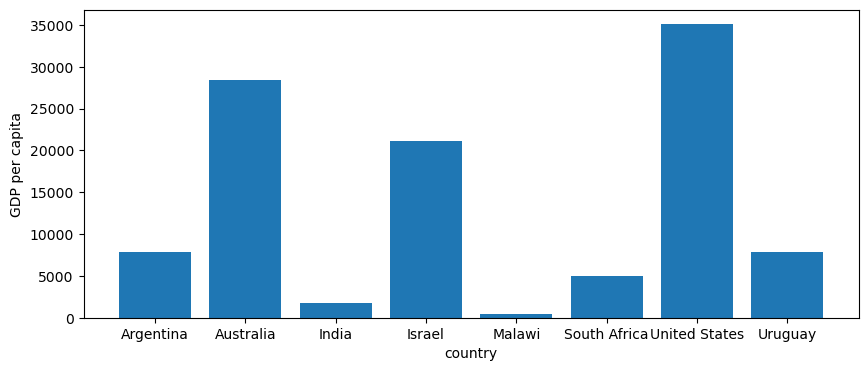

In [34]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(df.index, df['GDPpc'])
ax.set_xlabel('country')
ax.set_ylabel('GDP per capita')
plt.show()

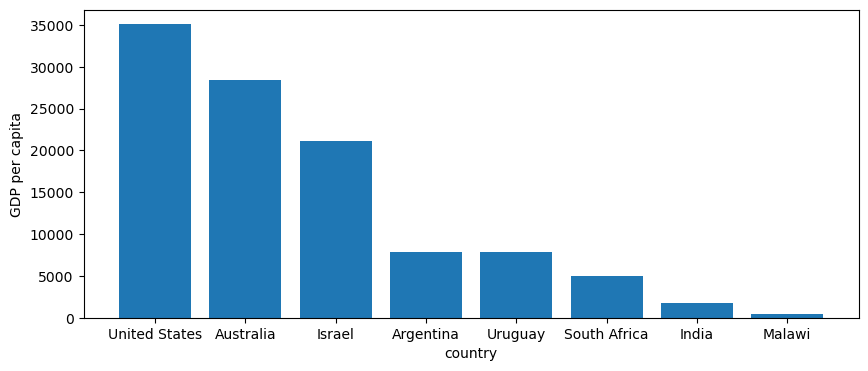

In [36]:
df = df.sort_values(by='GDPpc', ascending=False)
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(df.index, df['GDPpc'])
ax.set_xlabel('country')
ax.set_ylabel('GDP per capita')
plt.show()

## Using requests to get datasets

In [39]:
r = requests.get('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2024-06-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-07-29&revision_date=2024-07-29&nd=1948-01-01')

In [43]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2024-06-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-07-29&revision_date=2024-07-29&nd=1948-01-01'
source = requests.get(url).content.decode().split("\n")

In [ ]:
data = pd.read_csv(url,index_col=0, parse_dates = True)
data.iloc[:,0] # view all rows, first column

observation_date
1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-02-01    3.9
2024-03-01    3.9
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.1
Name: UNRATE, Length: 918, dtype: float64

In [55]:
data["2000":"2024"]

,UNRATE
observation_date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0
...,...
2024-02-01,3.9
2024-03-01,3.9
2024-04-01,3.9


[]

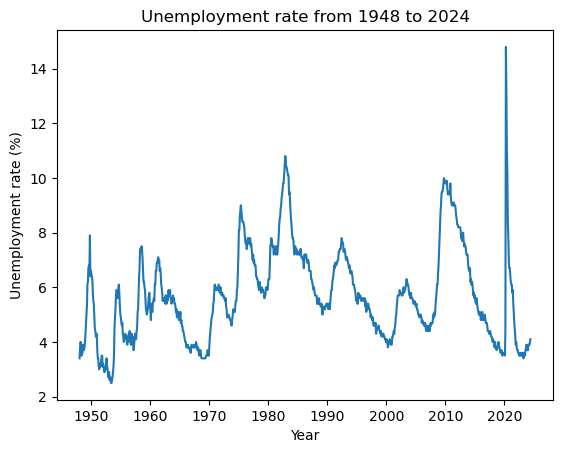

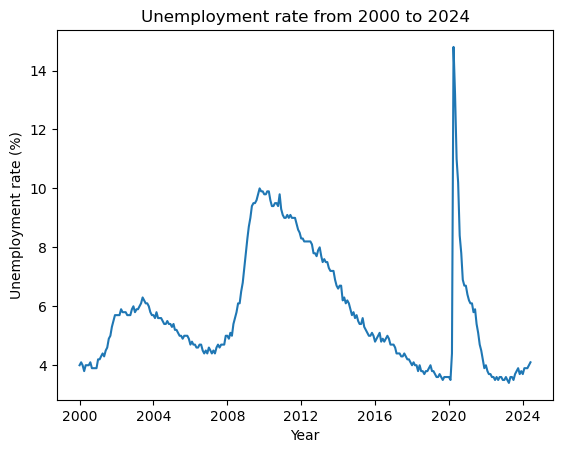

In [67]:
fig, ax = plt.subplots()
ax.plot(data["UNRATE"])
plt.title("Unemployment rate from 1948 to 2024")
plt.xlabel("Year")
plt.ylabel("Unemployment rate (%)")
plt.plot()

fig, ax1 = plt.subplots()
ax1.plot(data["2000":"2024"])
plt.title("Unemployment rate from 2000 to 2024")
plt.xlabel("Year")
plt.ylabel("Unemployment rate (%)")
plt.plot()

# Exercise 14.1

Write a program to calculate the percentage change in price over 2021 for the given shares.

In [130]:
import datetime as dt
import yfinance as yf

def read_data(ticker_list,
          start=dt.datetime(2021, 1, 1),
          end=dt.datetime(2021, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        stock = yf.Ticker(tick)
        prices = stock.history(start=start, end=end)

        # Change the index to date-only
        prices.index = pd.to_datetime(prices.index.date)
        
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'C': 'Citigroup',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google'}

ticker = read_data(ticker_list)
ticker = ticker.rename(columns=ticker_list) # changes the x axis names from tickers to company names
ticker



,Intel,Microsoft,IBM,BHP,Toyota,Apple,Amazon,Citigroup,Qualcomm,Coca-Cola,Google
2021-01-04,44.902943,210.002014,98.170776,51.894211,137.728195,126.405243,159.331497,51.345413,135.591232,46.388844,86.004646
2021-01-05,45.752728,210.204620,99.913338,53.550816,137.827026,127.968094,160.925507,52.677284,139.179596,45.878876,86.635658
2021-01-06,46.195690,204.754150,102.408401,55.253658,137.943817,123.660477,156.919006,55.708153,138.047424,44.419338,86.355476
2021-01-07,47.181076,210.580841,102.170776,56.386314,137.171143,127.880211,158.108002,56.365555,142.165359,43.926964,88.941231
2021-01-08,46.692917,211.863846,101.806427,56.602062,137.332886,128.983932,159.134995,55.810600,143.023697,44.911720,89.934532
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,47.588299,325.576416,113.674805,46.169281,169.702637,173.248444,171.068497,52.974903,169.930237,52.803318,146.448853
2021-12-27,48.172604,333.125122,114.536293,46.454372,171.660233,177.228790,169.669495,53.362019,173.268616,53.193310,147.365997
2021-12-28,48.005661,331.957794,115.415199,45.938126,170.598343,176.206665,170.660995,53.335636,171.864456,53.401913,145.757629
2021-12-29,48.070576,332.638763,116.041756,46.392731,169.610291,176.295166,169.201004,53.265244,173.147705,53.465401,145.813873


BHP         -10.527100
Citigroup     3.550563
Amazon        5.845049
Intel         6.868520
Coca-Cola    14.922491
IBM          18.700355
Toyota       23.416759
Qualcomm     25.318545
Apple        38.550782
Microsoft    57.179613
Google       68.960900
dtype: float64


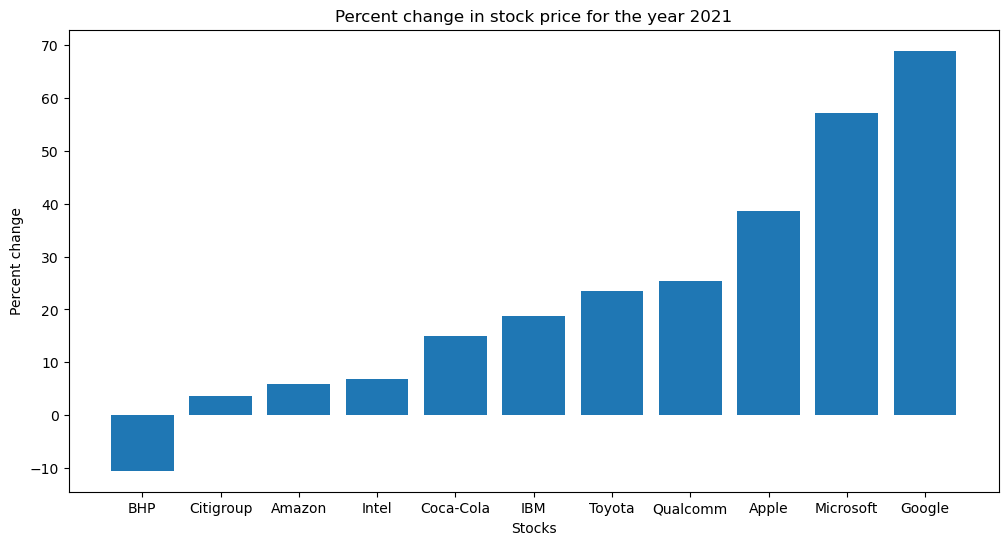

In [132]:
start = ticker.iloc[0,:] # first row, all columns
end = ticker.iloc[-1,:] # last row, all columns

percent_change = ((end-start)/start)*100
percent_change = percent_change.sort_values(ascending=True)

print(percent_change)

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(percent_change.index, percent_change)
plt.xlabel("Stocks")
plt.ylabel("Percent change")
plt.title("Percent change in stock price for the year 2021")
plt.show()

# Exercise 14.2

Obtain year on year percent change for the following indices

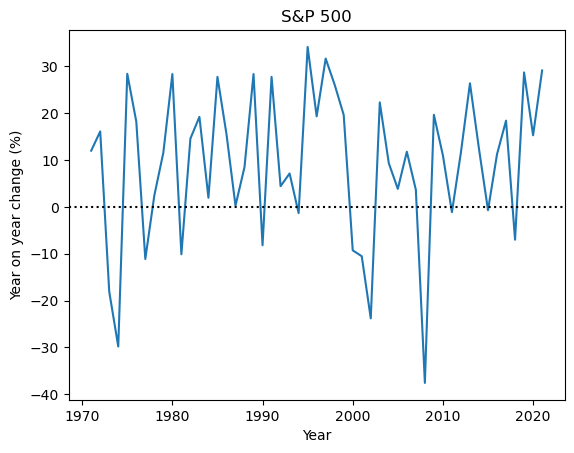

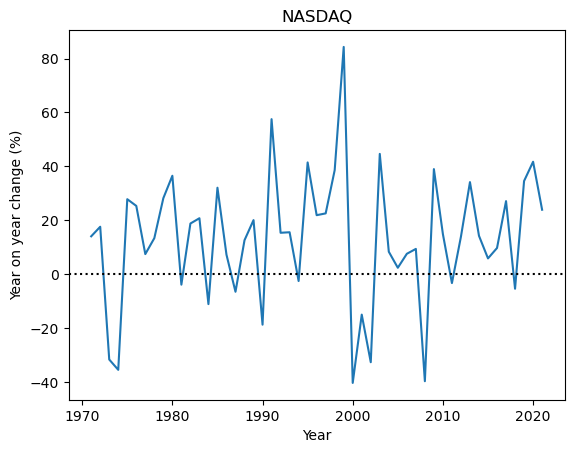

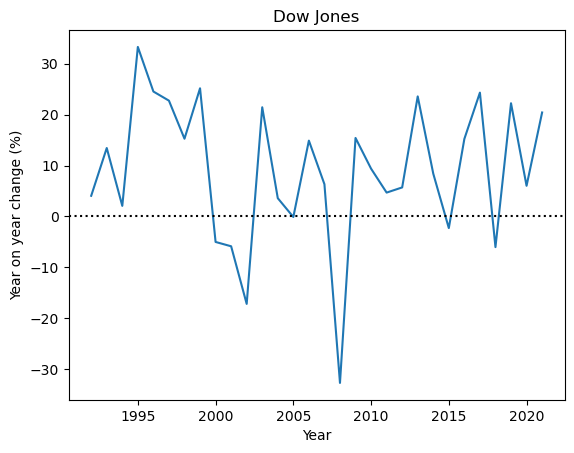

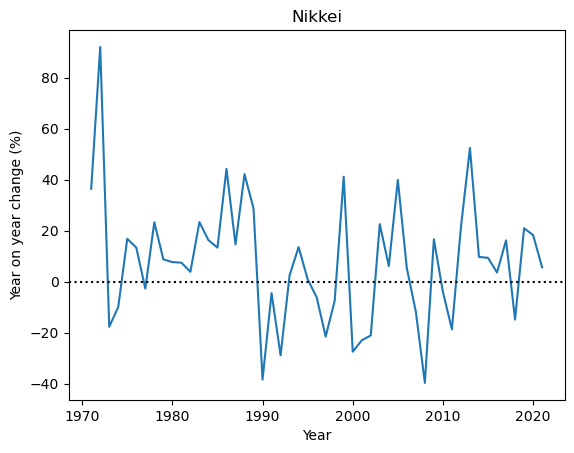

In [165]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

indices_data = read_data(indices_list, start=dt.datetime(1971,1,1))

for index in list(indices_data.columns):
    start = indices_data.groupby(indices_data.index.year)[index].first()
    end = indices_data.groupby(indices_data.index.year)[index].last()
    percent_change_index = ((end-start)/start)*100
    fig, ax = plt.subplots()
    ax.plot(percent_change_index)
    ax.axhline(0, color="black", linestyle = ":")
    plt.title(indices_list[index])
    plt.xlabel("Year")
    plt.ylabel("Year on year change (%)")
    plt.show()

